# Support Vector Machines (SVM)

# Introduction

The support vector machine is a type of supervised learning algorithm used for classification and regression analysis.
The support vector machine is based on the idea of finding a hyperplane that best separates the data points into different classes.
The hyperplane is chosen such that it maximizes the margin between the two classes. The support vector machine is a generalization of the maximal margin classifier and the support vector classifier.
Therefore, before starting, we need to touch on a little maximal margin classifier and the support vector classifier.


#### Maximal Margin Classifier

The maximal margin classifier is a simple linear classifier that separates the data points into different classes by finding a hyperplane that maximizes the margin between the two classes.
The margin is defined as the distance between the hyperplane and the closest data points from each class.
The maximal margin classifier is a special case of the support vector classifier.

The maximal margin classifier is designed specifically for linearly separable data, which refers to the condition in which data can be separated linearly using a hyperplane.
However, this classifier has some drawbacks. It is heavily reliant on the support vector and changes as support vectors change, which makes it tend to overfit.
It also can’t be used for data that isn’t linearly separable, which makes it inefficient for the majority of real-world data that is non-linear.

<img src="./svm/mmc.png" alt="sfsdgeg" />

#### Support Vector Classifier

The support vector classifier is a linear classifier that separates the data points into different classes by finding a hyperplane that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the closest data points from each class. The support vector classifier is a special case of the support vector machine.

The support vector classifier is an extension of the maximal margin classifier and is less sensitive to individual data. Since it allows certain data to be misclassified, it’s also known as the “Soft Margin Classifier”. It creates a budget under which the misclassification allowance is granted. This classifier covers the drawbacks of the maximal margin classifier by allowing for some misclassification and being less reliant on the support vector.

<img src="./svm/svc.png">

#### Hyperplanes

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

# Understanding the mathematics behind SVM

Many people skip the math intuition behind this algorithm because it is pretty hard to digest. Here in this section, we’ll try to understand each and every step working under the hood.

#### Understanding Dot-Product

<img src="./svm/math_1.png" alt="sfsdgeg" />

Here a and b are 2 vectors, to find the dot product between these 2 vectors we first find the magnitude of both the vectors (to find magnitude we use the Pythagorean theorem or the distance formula). After finding the magnitude we simply multiply it with the cosine angle between both the vectors. Mathematically it can be written as:

$$\overrightarrow{a} \cdot \overrightarrow{b} = \vert a \vert cos\theta \cdot \vert b \vert$$

Now in SVM we just need the projection of A not the magnitude of B, I’ll tell you why later. To just get the projection we can simply take the unit vector of B. Hence now the equation becomes:

$$\overrightarrow{a} \cdot \overrightarrow{b} = \vert a \vert cos\theta \cdot \text{unit vector of }b$$

#### Use of Dot Product in SVM

Consider a random point X and we want to know whether it lies on the right side of the plane or the left side of the plane (positive or negative).

<img src="./svm/math_2.png" alt="sfsdgeg" />

To find this first we assume this point is a vector (X) and then we make a vector (w) which is perpendicular to the hyperplane. Let’s say the distance of vector w from origin to decision boundary is ‘c’. Now we take the projection of X vector on w.

<img src="./svm/math_3.png" alt="sfsdgeg" />

We already know that projection of any vector or another vector is called dot-product. Hence, we take the dot product of x and w vectors. If the dot product is greater than ‘c’ then we can say that the point lies on the right side. If the dot product is less than ‘c’ then the point is on the left side and if the dot product is equal to ‘c’ then the point lies on the decision boundary.

$\overrightarrow{x} \cdot \overrightarrow{w} = c$ *(the point lies on the decision boundary)*<br/>
$\overrightarrow{x} \cdot \overrightarrow{w} > c$ *(positive samples)*<br/>
$\overrightarrow{x} \cdot \overrightarrow{w} > c$ *(negative samples)*

#### Equation of the Hyperplane, Margin

This equation is derived from two-dimensional vectors. But in fact, it also works for any number of dimensions. Equation of the hyperplane:

$$\omega \cdot x + b = 0$$

Distance from a data point to the decision boundary:<br/>
$$\text{Margin} = \frac{1}{\Vert \omega \Vert}$$

#### Task of SVM

In task of SVM classification problem where 
$x = \mathbb{R}^p$ and $y = \{-1, +1\}$, we aim to find parameters $w$ in $\mathbb{R}^p$ and $b$ in $\mathbb{R}$. The classification algorithm $a(x, w)$ is defined as $\text{sign}(\langle x, w \rangle - b)$.

Let's build simple SVM classifier with some predefined x and w and use it on test data

In [15]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Generate random data
X = np.random.randn(20, 2)
y = np.repeat([-1, 1], 10)
X[y == 1] += 1

# Predefine w and b
w = np.array((1.5, 1.2))
b = 1.0

# Define the SVM classifier function
def simple_svm_classifier(x, w, b):
    return np.sign(np.dot(x, w) - b)

# Calculate predictions using the classifier
predictions = simple_svm_classifier(X, w, b)

# Create a Plotly figure
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=y, colorscale='Viridis', line=dict(width=1)),
                         name='Actual Values'))

# Plot predicted values
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=predictions, colorscale='Viridis', line=dict(width=1)),
                         name='Predicted Values'))

# Update layout
fig.update_layout(title='SVM Classifier - Actual vs Predicted',
                  xaxis_title='Feature 1',
                  yaxis_title='Feature 2',
                  width=1000, height=600)

# Display the plot
fig.show()


On the charts above, we can see actual and predicted data classification. Now it would be great to see hyperplane or decision boundary on the chart above.
Equasion of decision boundary for 2 feature classification will be:

$$\omega0 \cdot x0 + \omega1 \cdot x1 + b = 0$$


In [16]:
import numpy as np
import plotly.graph_objects as go

# Assume w, b, X, and predictions are already defined as in your previous context

# Create x_range and calculate y_range for the decision boundary
x_range = np.linspace(-5, 5, 100)
y_range = (-w[0] * x_range + b) / w[1]

# Create a Plotly figure
fig = go.Figure()

# Add scatter plot for predicted values
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=predictions, colorscale='Viridis', line=dict(width=1)),
                         name='Predicted Values'))

# Add line plot for the decision boundary
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines',
                         line=dict(color='blue'),
                         name='Decision Boundary'))

# Update layout
fig.update_layout(title='Predicted Values with Decision Boundary',
                  xaxis=dict(range=[-3, 3], title='Feature 1'),
                  yaxis=dict(range=[-3, 3], title='Feature 2'),
                  width=1000, height=500)

# Display the plot
fig.show()


We use a method for minimizing the approximate regularized empirical risk:

$$
\sum_{i=1}^{n} (1 - M_i(W, W_0)) + \frac{1}{2}C ||W||^2 \rightarrow \min_{W, W_0}
$$

where $M_i(W, W_0) = Y_i(\langle x_i, W \rangle - W_0)$ is the margin of object $x_i$.



$\sum_{i=1}^{n} (1 - M_i(W, W_0))$ is Hinge Loss Function that using for punish forecasts that are off margin

$\frac{1}{2}C ||W||^2$ is Regularization Term that help model to control its complexity

Let's build SVM model and apply information above to its training

In [17]:
#Creating model that will calculate proper w and b
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                margin = y_[idx] * (np.dot(x_i, self.w) - self.b) #Calculating margin
                condition = -1 <= margin >= 1
                regularization_term = 0.5 * self.lambda_param * np.linalg.norm(self.w)**2 #Calculating regularization term
                if condition:
                    self.w -= self.lr * regularization_term
                else:
                    self.w -= self.lr * (regularization_term - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)#Use calculated w and b in classificator that we used previousy

Now it's time to fit our model on generated data and visualize result

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

# Assuming the SVM class and its methods are defined elsewhere

# Generate data
X = np.random.randn(400, 2)
y = np.repeat([-1, 1], 200)
X[y == 1] += 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Train the SVM
svm = SVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy}")

# Prepare data for hyperplane visualization
x_range = np.linspace(-5, 5, 100)
y_range = (-svm.w[0] * x_range + svm.b) / svm.w[1]

# Create a Plotly figure
fig = go.Figure()

# Add scatter plot for test data
fig.add_trace(go.Scatter(x=X_test[:, 0], y=X_test[:, 1], mode='markers',
                         marker=dict(color=y_test, colorscale='Viridis', line=dict(width=1)),
                         name='Test Data'))

# Add line plot for the hyperplane
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines',
                         line=dict(color='blue'),
                         name='Hyperplane'))

# Update layout
fig.update_layout(title='SVM Hyperplane Visualization',
                  xaxis_title='Feature 1',
                  yaxis_title='Feature 2',
                  width=800, height=600)

# Display the plot
fig.show()


Accuracy: 79.16666666666666


# Kernels in Support Vector Machine

The most interesting feature of SVM is that it can even work with a non-linear dataset and for this, we use “Kernel Trick” which makes it easier to classifies the points. Suppose we have a dataset like this:

<img src="./svm/kernel_1.png" alt="sfsdgeg" />

Here we see we cannot draw a single line or say hyperplane which can classify the points correctly. So what we do is try converting this lower dimension space to a higher dimension space using some quadratic functions which will allow us to find a decision boundary that clearly divides the data points. These functions which help us do this are called Kernels and which kernel to use is purely determined by hyperparameter tuning.

<img src="./svm/kernel_2.png" alt="sfsdgeg" />

# TODO: Описание Условия Каруша — Куна — Таккера и Метод множителей Лагранжа

In [20]:
class KernelSVM(SVM):
    def __init__(self, kernel, C=1.0, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.alpha = np.zeros((n_samples))
        self.sv_idx = np.arange(0, n_samples)
        self.X = X
        self.y = y_

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        for _ in range(self.n_iters):
            for i in range(n_samples):
                if np.sum(K[:,i] * self.alpha * y_) - self.alpha[i] * y_[i] * K[i,i] >= 0:
                    self.alpha[i] -= self.lr * (1 - y_[i] * np.sum(K[:,i] * self.alpha * y_))
                else:
                    self.alpha[i] -= self.lr * (1 - y_[i] * np.sum(K[:,i] * self.alpha * y_) - 2 * self.lambda_param * self.alpha[i])

        self.sv_idx = np.where(self.alpha > 1e-5)[0]
        self.alpha = self.alpha[self.sv_idx]
        self.sv = X[self.sv_idx]
        self.sv_y = y_[self.sv_idx]

        self.b = 0
        for n in range(len(self.alpha)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.alpha * self.sv_y * K[self.sv_idx[n],self.sv_idx])
        self.b /= len(self.alpha)

    def project(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                s += a * sv_y * self.kernel(X[i], sv)
            y_predict[i] = s
        return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

def rbf_kernel(x1, x2, sigma=5.0):
    return np.exp(-np.linalg.norm(x1-x2)**2 / (2 * (sigma ** 2)))

In [21]:
svm = KernelSVM(rbf_kernel, learning_rate=0.001, lambda_param=0.01, n_iters=1000)

svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

print(f"Accuracy: {np.mean(predictions == y_test) * 100}")

Accuracy: 66.66666666666666


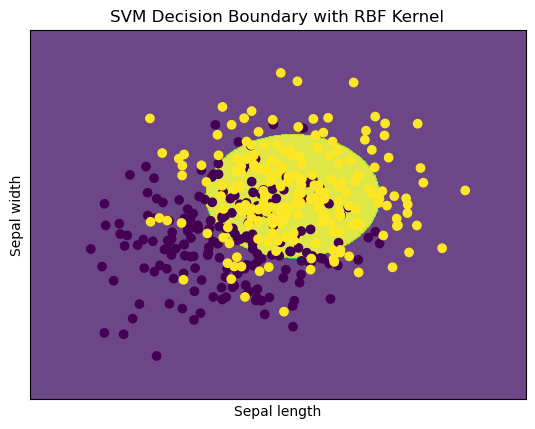

In [23]:
def plot_decision_boundary(svm, X, y):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.show()

plot_decision_boundary(svm, X, y)

In [24]:
import numpy as np
import plotly.graph_objects as go

# Assuming X and y are your data and labels

# Create and train the Kernel SVM
kernel_svm = KernelSVM(kernel=rbf_kernel)
kernel_svm.fit(X, y)

# Create a grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on the grid points
Z = kernel_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotly figure
fig = go.Figure()

# Add scatter plot for the data points
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=y, colorscale='Viridis', line=dict(width=1)),
                         name='Data Points'))

# Add contour for decision boundary
fig.add_trace(go.Contour(x=np.linspace(x_min, x_max, 100), y=np.linspace(y_min, y_max, 100), z=Z,
                         showscale=False, line_width=2, name='Decision Boundary'))

# Update layout
fig.update_layout(title='Kernel SVM Decision Boundary',
                  xaxis_title='Feature 1',
                  yaxis_title='Feature 2',
                  width=800, height=600)

# Display the plot
fig.show()


In [25]:
import numpy as np
import plotly.graph_objects as go

# Assuming svm, X, and y are already defined and SVM is trained

def plot_decision_boundary_plotly(svm, X, y):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create Plotly figure
    fig = go.Figure()

    # Add contour for decision boundary
    fig.add_trace(go.Contour(x=np.linspace(x_min, x_max, int((x_max - x_min) / h + 1)),
                             y=np.linspace(y_min, y_max, int((y_max - y_min) / h + 1)),
                             z=Z, colorscale='Viridis', opacity=0.8, name='Decision Boundary'))

    # Add scatter plot for data points
    fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                             marker=dict(color=y, colorscale='Viridis', line=dict(width=1)),
                             name='Data Points'))

    # Update layout
    fig.update_layout(title='SVM Decision Boundary with RBF Kernel',
                      xaxis_title='Sepal length',
                      yaxis_title='Sepal width',
                      xaxis=dict(range=[xx.min(), xx.max()]),
                      yaxis=dict(range=[yy.min(), yy.max()]),
                      width=800, height=600)

    # Display the plot
    fig.show()

plot_decision_boundary_plotly(svm, X, y)
